## Assignment 3

In [50]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]
import matplotlib as mpl


#### Function Definations

In [24]:
def one_hot_encoding(y, numOfClasses):
    """
    Converts label into one-hot encoding.
    takes in the labels and the number of classes 
    """
    encoded = np.zeros((y.shape[0],numOfClasses))
    for i in range(y.shape[0]):
        encoded[i][y[i]] = 1.0
    return encoded

def sigmoid(x):
    """
    Sigmoid activation function
    converts the output in the range (0,1)
    """
    return 1.0 / (1.0 + np.exp(-x))

def forward_propagation(X, w1, w2, b1, b2):
    """
    Does forward propagation in the neural network.
    Takes the input matrix, weights and biases as input
    """
    a0 = X
    z1 = (np.dot(a0,w1.T).T + b1)
    a1 = sigmoid(z1)
    z2 = (np.dot(w2, a1)+ b2)
    a2 = sigmoid(z2).T
    return a0,a1,a2,z1,z2

def backward_propagation(a1,a2,X,y,w1,w2,b1,b2):
    """
    Applies backward propagation to the neural network and calculates the weight and bias gradients
    """
    m = y.shape[0]
    dz2 = a2-y
    dw2 = (1/m) * np.dot(dz2.T, a1.T)
    db2 = (1/m) * np.sum(dz2.T, axis=1, keepdims=True)
    da1 = np.dot(dz2, w2)
    dz1 = np.multiply(da1.T,np.multiply(a1,(1-a1)))
    dw1 = (1/m) * np.dot(dz1, X)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, dw2, db1, db2

def gradient_descent(X, y, w1, w2, b1, b2, alpha,ep):
    """
    Update weights using the gradients from the backward propagation and improves network performance
    """
    m = y.shape[0]
    cost_history = []
    epochs = 1
    a0, a1, a2, z1, z2 = forward_propagation(X, w1, w2, b1, b2)
    newCost = compute_cost(a2, y)
    oldCost = float('inf')
    cost_history.append(newCost)
    while (newCost < oldCost and abs(newCost - oldCost) > 1e-6) and epochs < ep:
        dw1, dw2, db1, db2 = backward_propagation(a1, a2, X, y, w1, w2, b1, b2)
        
        # update weights
        w1 = w1 - (alpha * dw1)
        w2 = w2 - (alpha * dw2)
        b1 = b1 - (alpha * db1)
        b2 = b2 - (alpha * db2)
        
        oldCost = newCost
        a0, a1, a2, z1, z2 = forward_propagation(X, w1, w2, b1, b2)
        newCost = compute_cost(a2, y)
        cost_history.append(newCost)
        epochs = epochs + 1
        
    min_cost_iter = cost_history.index(min(cost_history))
    print ("Minimum cost at iteration: ", min_cost_iter)
    print ("Minimum cost achieved: ", min(cost_history))
    return cost_history, w1, w2, b1, b2 

def softmax(x):
    """
    Converts the sigmoid output from second last layer into confidence probabilities
    """
    mat = np.exp(x)
    return mat / mat.sum(0)

def compute_cost(prediction, actual):
    """
    Computes the cost given the prediction and actual labels
    """
    m = actual.shape[0]
    loss = np.multiply(actual, np.log(prediction)) + np.multiply((1-actual), np.log(1 - prediction))
    cost = (-1/m) * np.sum(loss)
    return cost

def initialize_weights(input_layer_size,hidden_layer_size,output_layer_size):
    """
    Initializes weights for input to hidden and hidden to output layer
    """
    np.random.seed(1)
    w1 = np.random.randn(hidden_layer_size, input_layer_size)*0.01
    w2 = np.random.randn(output_layer_size, hidden_layer_size)*0.01
    return (w1, w2)

def initialize_bias_weights(hidden_layer_size,output_layer_size):
    """
    initialize bias weights to zero for input to hidden and hidden to output layer
    """
    bias1 = np.zeros((hidden_layer_size, 1))
    bias2 = np.zeros((output_layer_size, 1))
    return bias1, bias2

def predict(w1, w2, b1, b2, X):
    """
    Predicts the actual output using softmax
    """
    m = X.shape[0]
    num_labels = w2.shape[0]
    p = np.zeros((m,1))
    h1 = sigmoid((np.dot(X,w1.T).T + b1).T)
    h2 = sigmoid((np.dot(h1,w2.T).T + b2).T)
    p = softmax(h2)
    actual_pred = []
    for item in p:
        actual_pred.append(np.argmax(item))
    return actual_pred

def accuracy(actual, predicted):
    """
    Calculates the accuracy of the model
    """
    count = 0
    for x,y in zip(actual, predicted):
        if x == y:
            count = count + 1
    return round(count/actual.shape[0], 5)

#### load the data

In [25]:
train_data = pd.read_csv('./ex3_train.csv')
test_data = pd.read_csv('./ex3_test.csv')

#### split the data into X and y

In [26]:
X_train = train_data.iloc[:, train_data.columns != 'y']
y_train = train_data["y"].values.reshape(-1,1)
X_test = test_data.iloc[:, test_data.columns != 'y']
y_test = test_data["y"]

X_train_array = np.asarray(X_train)
y_train_array = np.asarray(y_train)
X_test_array = np.asarray(X_test)
y_test_array = np.asarray(y_test)

#### One-hot encode the labels

In [27]:
y_train_encoded = one_hot_encoding(y_train_array, 10)

#### Network architecture

In [28]:
input_layer_size = 400
hidden_layer_size = 25
output_layer_size = 10

#### Initialize Parameters

Initialize weights

In [29]:
w1, w2 = initialize_weights(input_layer_size, hidden_layer_size, output_layer_size)

Initializing bias weights to 0

In [30]:
b1, b2 = initialize_bias_weights(hidden_layer_size,output_layer_size)

#### using learning rate 1

Minimum cost, weights and bias

In [31]:
cost_history1, wl_result1, w2_result1, b1_res1, b2_res1 = gradient_descent(X_train_array,y_train_encoded,w1,w2,\
                                                                                b1, b2, 1, 100000)

Minimum cost at iteration:  15655
Minimum cost achieved:  0.0115690717465


Prediction and Accuracy on train dataset

In [32]:
predictions1_train = predict(wl_result1, w2_result1, b1_res1, b2_res1, X_train_array)
accuracy1_train = accuracy(y_train_array, predictions1_train)
print ("Accuracy on train dataset using learning rate 1: ", accuracy1_train)

Accuracy on train dataset using learning rate 1:  1.0


Prediction and Accuracy on test dataset

In [33]:
predictions1_test = predict(wl_result1, w2_result1, b1_res1, b2_res1, X_test_array)
accuracy1_test = accuracy(y_test_array, predictions1_test)
print ("Accuracy on test dataset using learning rate 1: ", accuracy1_test)

Accuracy on test dataset using learning rate 1:  0.924


Plot of cost versus no. of iterations 

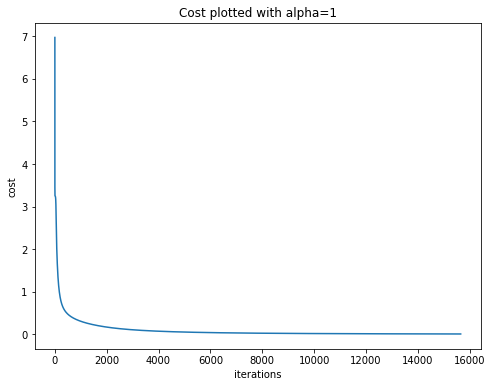

In [34]:
plt.plot(cost_history1)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=1")
plt.show()

#### using learning rate 0.5

In [35]:
cost_history05, wl_result05, w2_result05, b1_res05, b2_res05 = gradient_descent(X_train_array,y_train_encoded,w1,w2,\
                                                                                b1, b2, 0.5, 100000)

Minimum cost at iteration:  23285
Minimum cost achieved:  0.0166720069125


Prediction and Accuracy on train dataset

In [36]:
predictions05_train = predict(wl_result05, w2_result05, b1_res05, b2_res05, X_train_array)
accuracy05_train = accuracy(y_train_array, predictions05_train)
print ("Accuracy on train dataset using learning rate 0.5: ", accuracy05_train)

Accuracy on train dataset using learning rate 0.5:  1.0


Prediction and Accuracy on test dataset

In [37]:
predictions05_test = predict(wl_result05, w2_result05, b1_res05, b2_res05, X_test_array)
accuracy05_test = accuracy(y_test_array, predictions05_test)
print ("Accuracy on test dataset using learning rate 0.5: ", accuracy05_test)

Accuracy on test dataset using learning rate 0.5:  0.92867


Plot of cost versus no. of iterations

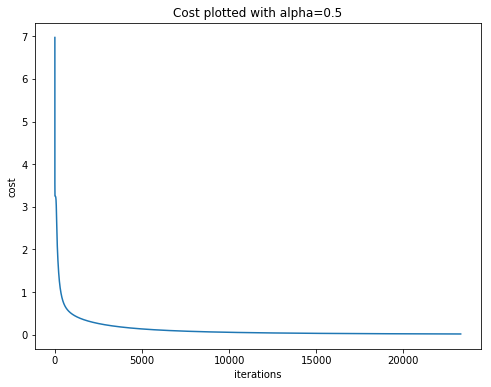

In [38]:
plt.plot(cost_history05)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.5")
plt.show()

#### using learning rate 0.1

In [39]:
cost_history01, wl_result01, w2_result01, b1_res01, b2_res01 = gradient_descent(X_train_array,y_train_encoded,w1,w2,\
                                                                                b1, b2, 0.1, 100000)

Minimum cost at iteration:  61466
Minimum cost achieved:  0.0420853812964


Prediction and Accuracy on train dataset

In [40]:
predictions01_train = predict(wl_result01, w2_result01, b1_res01, b2_res01, X_train_array)
accuracy01_train = accuracy(y_train_array, predictions01_train)
print ("Accuracy on train dataset using learning rate 0.1: ", accuracy01_train)

Accuracy on train dataset using learning rate 0.1:  0.99943


Prediction and Accuracy on test dataset

In [41]:
predictions01_test = predict(wl_result01, w2_result01, b1_res01, b2_res01, X_test_array)
accuracy01_test = accuracy(y_test_array, predictions01_test)
print ("Accuracy on test dataset using learning rate 0.1: ", accuracy01_test)

Accuracy on test dataset using learning rate 0.1:  0.93


Plot of cost versus no. of iterations

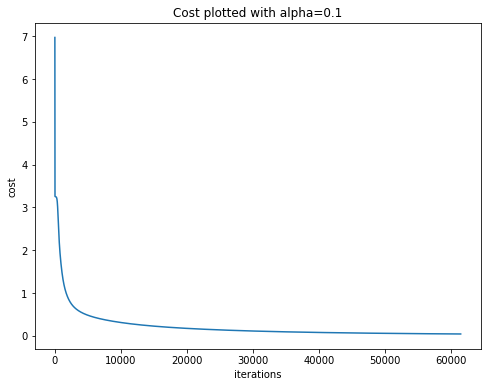

In [42]:
plt.plot(cost_history01)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.1")
plt.show()

#### using learning rate 0.01

In [43]:
cost_history001, wl_result001, w2_result001, b1_res001, b2_res001 = gradient_descent(X_train_array,y_train_encoded,w1,\
                                                                                     w2,b1, b2, 0.01, 120000)

Minimum cost at iteration:  119999
Minimum cost achieved:  0.271088458127


Prediction and Accuracy on train dataset

In [44]:
predictions001_train = predict(wl_result001, w2_result001, b1_res001, b2_res001, X_train_array)
accuracy001_train = accuracy(y_train_array, predictions001_train)
print ("Accuracy on train dataset using learning rate 0.01: ", accuracy001_train)

Accuracy on train dataset using learning rate 0.01:  0.97086


Prediction and Accuracy on test dataset

In [45]:
predictions001_test = predict(wl_result001, w2_result001, b1_res001, b2_res001, X_test_array)
accuracy001_test = accuracy(y_test_array, predictions001_test)
print ("Accuracy on test dataset using learning rate 0.01: ", accuracy001_test)

Accuracy on test dataset using learning rate 0.01:  0.928


Plot of cost versus no. of iterations

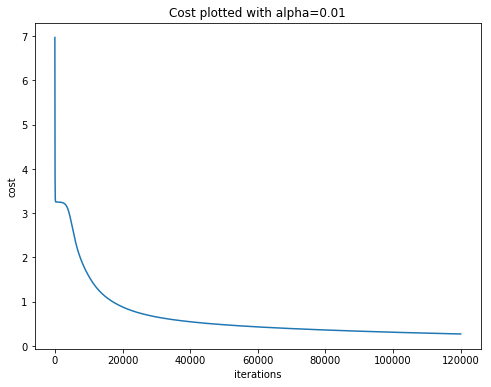

In [46]:
plt.plot(cost_history001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.01")
plt.show()

#### Plots of costs with all alphas in one graph 

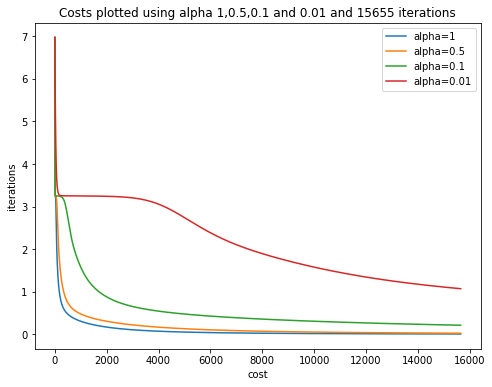

In [80]:
costs = [cost_history1, cost_history05[0:15656], cost_history01[0:15656], cost_history001[0:15656]]
iterations = range(0, 15656)
plt.plot(iterations, costs[0], label="alpha=1")
plt.plot(iterations, costs[1], label="alpha=0.5")
plt.plot(iterations, costs[2], label="alpha=0.1")
plt.plot(iterations, costs[3], label="alpha=0.01")

plt.xlabel("cost")
plt.ylabel("iterations")
plt.title("Costs plotted using alpha 1,0.5,0.1 and 0.01 and 15655 iterations")
plt.legend()
plt.show()

#### Optimized Accuracy on Test Dataset

In [47]:
print ("Optimized Accuracy achieved on Test dataset: ", accuracy01_test)

Optimized Accuracy achieved on Test dataset:  0.93
